# 2.1 Loading the MNIST data set
MNIST is built in too the keras.datasets package. We only need to import this package and then load it.

The first step is to import the packages we will need for the rest of this notebook. Execute the code in the cell below to load these packages. This code should execute without errors or warnings if everything is installed correctly.

In [3]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.optimizers import rmsprop
import numpy as np
import numpy.random as nr
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Notice that the TensorFlow backend has been loaded along with various Keras packages. Keras is making calls to TensorFlow to perform compuations.

Now, load the training and testing images and corresponding labels by executing the coded in the cell below. The load_data method creates two tuples of the images and labels for training and testing models.

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


With the data loaded, let's have a peak at some of the content. The images of the handwritten digits are represented as rectangular arrays of dimension $28x28$. You can see this by executing the code in the cell below.

In [5]:
print(train_images[4].shape)

(28, 28)


The handwritten images are all gray-scale, so do not have a color dimension.

The code in the cell below displays 4 of the 60,000 images of handwritten digits along with their labels. Execute this code and examine the results.

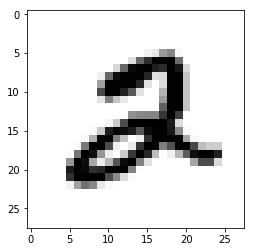

Label = 2


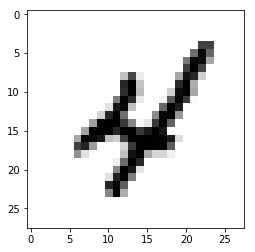

Label = 4


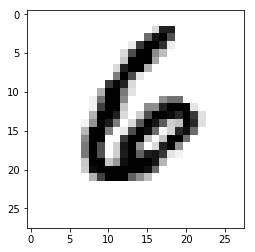

Label = 6


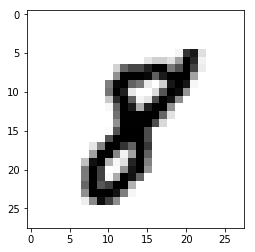

Label = 8


In [6]:
for i in range(5, 20, 4):
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.show()
    print('Label = ' + str(train_labels[i]))

# 2.2 Prepare the data for training.
As is the case with all machine learning problems, preparing the data is an important step. Without careful data preparation even the best models will produce poor results, or even fail to execute.

The MNIST images are stored as a 3-d tensor. Each image tensor has dimensions $6000\ x\ 28\ x\ 28$. However, to train a neural network on these images we must flatten this representation so that each image is a vector of length $28 * 28$. The result will be a 2-d tensor of dimensions $60000\ x\ (28*28)$.

Further, models created with Keras, and most other deep learning frameworks, operate on floating point numbers. The gray scale pixel values of the images are coded as integers in the range $\{ 0, 255 \}$. These pixel values must be coerced to floating point and then standardized to be in a range $\{ 0.0, 1.0 \}$. As is the case for training many machine learning models, it is best to use standardized values for training deep neural networks.

The code in the cell below flattens the images and converts the pixel values to a standardized floating point number. Execute this code.

In [11]:
print(train_images.shape, train_labels.shape)
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28) (60000,)
(60000, 784)
float32


Notice the original shape and resulting shape of the training image tensor. In addition, the array is now of type float32.

Execute the code in the cell below to apply the same transformation to the test images.

In [13]:
print(test_images.shape, test_labels.shape)
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
print(test_images.shape)

(10000, 28, 28) (10000,)
(10000, 784)


Since we are working on a classification problem, the label values must be of a categorical type. Execute the code in the cell below and examine the coding of these labels.

In [14]:
print(train_labels[5:,])

[2 1 3 ... 5 6 8]


The labels are coded as integers corresponding to the digit in the image. These values must be coerced to a categorical type. For Keras, categorical types must be one hot encoded. One hot encoding is a set of binary columns, one for each category.

Fortunately the to_categorical method in the keras.utils.np_utils package does just this. Execute the code in the cell below and examine the printed results.

In [16]:
train_labels = ku.to_categorical(train_labels)
print(train_labels[5:,])

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [17]:
test_labels = ku.to_categorical(test_labels)

### 2.3 Defining a sequential model
The data is prepared, so it is time to start defining a neural nework model. We are using a simple feedforward model which is one type of sequential model Keras can create. There is a general receipe for defining sequential Keras models:

1. Define a sequential model object.
2. Define one or more hidden layers.
3. Define an output layer.

You will find a quick start guide to Keras sequential models in the Keras documentation

Speficially in this case, the squential model is defined as follows:

1. A sequential model object nn is defined.
2. A single hidden layer is defined.
    - This layer is dense (fully connected) with 512 units.
    - The activation of each unit is rectilinear.
    - The hidden layer is expecting an input tensor of $28*28$ by an undefined number of cases (images).
3. The output layer has 10 hidden units.
    - We need 10 units since there are 10 categories of handwritten digits we are classifing.
    - This is a Multinomial classification problem so we are using softmax activation.

Execute this code to define the model.

In [18]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nn.add(layers.Dense(10, activation = 'softmax'))

### 2.4 Training and evaluating the sequential model
With a defined model it is time to train and evaluate it. First, the model must be compiled by executing the code below. This call specifies the following:

1. Specify an optimizer.
2. Specify a loss function. In this case we are performing Multinomial classification so we are using categorical_crossentropy.
3. Specify one or more metrics used to evaluate the performance of the model. In this case we are using just one metric, accuracy.

We will discuss the technical details of the model in subsequent lessons.

In [19]:
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Now, the model is ready to be trained using the fit method by executing the code in the cell below. The fit method has several arguments:

1. The training features.
2. The training labels.
3. The number of epochs (iterations) over which the model is trained.
4. The batch size used for the optimizer. The meaning of this will be discussed in the lesson on optimizaton

In [32]:
nr.seed(9898)
tf.random.set_seed(9777)
nn.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2563 - accuracy: 0.9256
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.1025 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0677 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0489 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0365 - accuracy: 0.9890


Notice that the loss declines and the accuracy increases with each training epoch. However, since neural networks tend to be over-fit, these improved figures may or may not indicate that the model is actually getting better. Keep in mind that the model may simply be learning the training data.

It is necessary to test the model on independent data set. The evaluate method allows you to do just this. Execute the code in the cell below and compare the results to training results.

In [33]:
nn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 74us/step


[0.0646577251338982, 0.980400025844574]

It appears that the model is over-fit since the evaluation loss and accuracy are a bit worse than observed in training.

## 3.0 Training over epochs
In order to determine at what point a model is overfit during training it is necessary to evaluate the model after each training epoch. A history object is created which contains the history of various metrics during the training or fitting process.

Notice that the validation_data argument must be specified so that performance of the model can be computed at the end or each epoch. The printed history of the training will include the validation loss and validation accuracy for each epoch.

Expect execution of this code to take a while.

In [37]:
## Define a sequential model and print a summary
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model. 
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
 
## Fit the model saving the results to a history file    
nr.seed(4678)
tf.random.set_seed(8866)
history = nnt.fit(train_images, train_labels, 
                  epochs = 10, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2603 - accuracy: 0.9240 - val_loss: 0.1347 - val_accuracy: 0.9590
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.1057 - accuracy: 0.9682 - val_loss: 0.1033 - val_accuracy: 0.9683
Epoch 3/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0688 - accuracy: 0.9790 - val_loss: 0.0800 - val_accuracy: 0.9754
Epoch 4/10
60000/60

To aid in understanding these figures it will help to make some plots comparing the training and evaluation performance as the training epochs evolve. The code in the next two cells does this is a somewhat primitive manner. The Numpy array is manually edited to include the training loss and training accuracy.

The plot_loss and plot_accuracy functions, in the next two cell, plot the training loss or accuracy in blue and the test loss or accuracy in red. Execute the code and examine the plots.

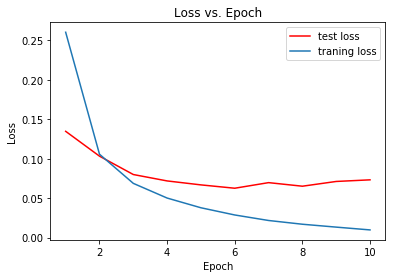

In [38]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    
plot_loss(history)

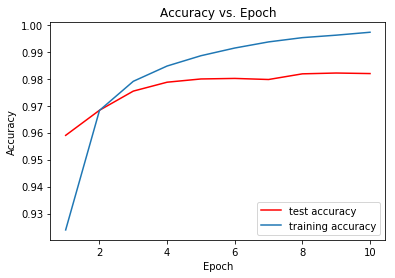

In [43]:
def plot_accuracy(history):
    train_accuracy = history.history['accuracy']
    test_accuracy = history.history['val_accuracy']
    x = list(range(1, len(test_accuracy) + 1))
    plt.plot(x, test_accuracy, color = 'red', label = 'test accuracy')
    plt.plot(x, train_accuracy, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
    
plot_accuracy(history)

Notice that the training loss and accuracy continue to improve throughout the epochs. However, the evaluation loss and accuracy only improve significantly for the first four, or perhaps 5, epochs. This is clear evidence that subsequent epochs are simply over-fitting the model.

## 4.0 Adding hidden layers
Next, we will add an additional hidden layer to the model. Additional layers add capacity to the model to represent complex function. However, the network becomes more susceptible to over fitting. Details of model capacity are discussed in other lessons.

The code in the cell below defines a model similar to the first one, but with a second layer defined. Notice that the definition of the two layer model is nearly the same as for the single layer model. In this case, the second layer has the same number of units and activation function as the first.

However, notice that the input_shape does not need to be defined for hidden layers past the first. Keras will determine the dimensions of tensors passed between layers beyond the input.

Expect execution of this code to take a while.

In [44]:
## Define a sequential model
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(512, activation = 'relu'))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
    
## Fit the model, saving the results to a history file.     
nr.seed(2432)
tf.random.set_seed(5544)
history = nnt.fit(train_images, train_labels, 
                  epochs = 20, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 108us/step - loss: 0.2189 - accuracy: 0.9324 - val_loss: 0.1086 - val_accuracy: 0.9643
Epoch 2/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.0820 - accuracy: 0.9753 - val_loss: 0.1051 - val_accuracy: 0.9646
Epoch 3/20
60000/60000 [========

As before, we can best understand these results by creating plots of the loss and accuracy for training and evaluation vs. epoch. Execute the code in the two cells below to display these plots and study the results.

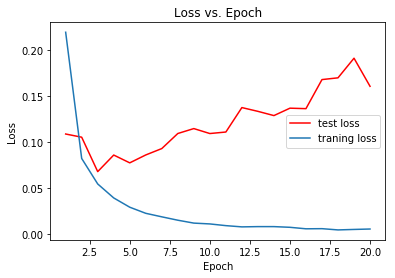

In [45]:
plot_loss(history)

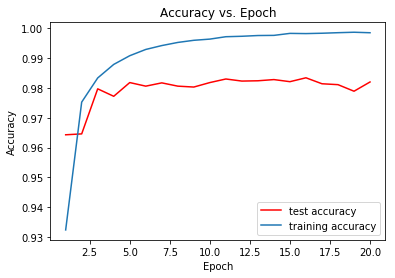

In [46]:
plot_accuracy(history)

# 5.0 Adding regularization to the model
Regularization is used to prevent over-fitting of machine learning models including neural networks. The Keras regularizers package provides L1 and L2 regularization methods. The theory of regularization will be addressed in other lessons. In addition you can find documentation on the Keras regularizers package.

The code in the cell below adds the kernel_regularizer argument with the value of regularizers.l2(0.01) This adds a weight decay penalty of 0.01 to the model weights.

Execute the code. Expect execution to take a while.

In [48]:
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ),
                        kernel_regularizer=regularizers.l2(0.001)))
nnt.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Define an optimzer object and compile the model
optimizer = rmsprop()
nnt.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
## Fit the compiled model    
nr.seed(8765)
tf.random.set_seed(7654)
history = nnt.fit(train_images, train_labels, 
                  epochs = 20, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.6372 - accuracy: 0.9227 - val_loss: 0.2893 - val_accuracy: 0.9671
Epoch 2/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.2648 - accuracy: 0.9608 - val_loss: 0.2091 - val_accuracy: 0.9706
Epoch 3/20
60000/60000 [========

Once again, we can best understand these results by creating plots of the loss and accuracy for training and evaluation vs. epoch. Execute the code in the two cells below to display these plots and study the results.

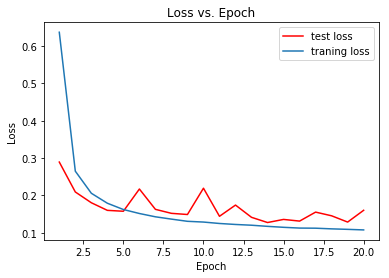

In [49]:

plot_loss(history)

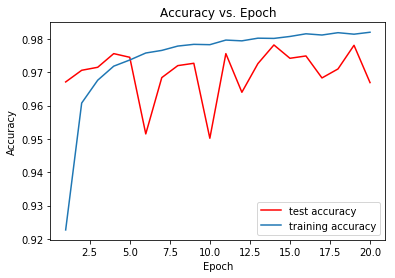

In [50]:
plot_accuracy(history)


Compare these results to the previous un-regularized model.